In [1]:
pip install finterstellar

     |████████████████████████████████| 109 kB 34.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

In [4]:
t = '2020Q3' # 2020년 3분기
data = fs.fn_consolidated(otp='16486231081001081001', term=t, vol=0) # 해당 분기의 모든 재무제표 데이터 불러오기
data['PER'] = data['Price_M3'] / data['EPS'] # PER 계산
data['PBR'] = data['Price_M3'] / (data['Shareholders Equity'] / data['Shares']) # PBR 계산
s1 = fs.fn_filter(data, by='PER', floor=1, cap=10, n=20, asc=True) # PER 기준 하위 20개 종목 선택
s2 = fs.fn_filter(data, by='PBR', floor=.1, cap=1, n=20, asc=True) # PBR 기준 하위 20개 종목 선택

2020Q3...OK


In [9]:
print(s1) # s1 확인

             PER
symbol          
VHC     1.250620
UIS     1.348869
JOB     1.538462
MX      1.575758
SND     1.577982
VTOL    1.613744
TNK     1.658133
LIVE    1.919629
BMA     1.941397
LODE    1.962264
CTO     2.126072
FRO     2.245487
TROX    2.270186
DHT     2.324444
BIG     2.329354
DX      2.354497
GGAL    2.355795
TPHS    2.358491
NRG     2.382614
FVE     2.387543


In [10]:
print(s2) # s2 확인

             PBR
symbol          
REI     0.103666
ACOR    0.104986
TNP     0.105140
GECC    0.105790
LTRPA   0.115385
BORR    0.120192
RIG     0.124788
GNW     0.125471
GLOP    0.136601
GURE    0.149526
SMHI    0.155095
CDEV    0.155154
FET     0.155406
GASS    0.157510
IRS     0.166423
BBGI    0.168959
NMM     0.174185
TCOM    0.174534
BHF     0.183101
WPG     0.190015


In [11]:
fs.combine_signal(s1, s2, how='and') # 교집합

,PER,PBR
symbol,,


In [12]:
s1 = fs.fn_score(data, by='PER', method='absolute', floor=1, cap=10, asc=True) # PER 기준 절대점수 계산
s2 = fs.fn_score(data, by='PBR', method='absolute', floor=.1, cap=1, asc=True) # PBR 기준 절대점수 계산

In [13]:
print(s1) # PER 기준 절대점수 확인

             PER  Score
symbol                 
VHC     1.250620   97.2
UIS     1.348869   96.1
JOB     1.538462   94.0
MX      1.575758   93.6
SND     1.577982   93.6
...          ...    ...
CZWI    9.900000    1.1
LCNB    9.925676    0.8
RDN     9.926471    0.8
FISI    9.955752    0.5
EBTC    9.980469    0.2

[294 rows x 2 columns]


In [14]:
print(s2) # PBR 기준 절대점수 확인

             PBR  Score
symbol                 
REI     0.103666   99.6
ACOR    0.104986   99.4
TNP     0.105140   99.4
GECC    0.105790   99.4
LTRPA   0.115385   98.3
...          ...    ...
STCN    0.997557    0.3
SITC    0.997706    0.3
FCF     0.998493    0.2
TEVA    0.998527    0.2
CRS     0.999287    0.1

[811 rows x 2 columns]


In [15]:
fs.combine_score(s1, s2, n=10) # 절대 합산 점수 계산 상위 10개 종목

,Score,Score_,Sum
symbol,,,
SND,46.80,42.40,89.20
GECC,38.75,49.70,88.45
TNK,46.35,37.65,84.00
STNG,36.90,39.60,76.50
PVL,37.10,37.20,74.30
LIVE,44.90,28.60,73.50
AEL,39.25,32.50,71.75
JOB,47.00,24.70,71.70
TNP,20.70,49.70,70.40


In [16]:
# 상대평가
f1 = fs.fn_score(data, by='PER', method='relative', floor=1, cap=10, asc=True) # PER 기준 상대점수 계산
f2 = fs.fn_score(data, by='PBR', method='relative', floor=.1, cap=1, asc=True) # PBR 기준 상대점수 계산

In [17]:
print(f1) # PER 기준 상대점수 확인

             PER  Score
symbol                 
VHC     1.250620  100.0
UIS     1.348869   99.7
JOB     1.538462   99.3
MX      1.575758   99.0
SND     1.577982   98.6
...          ...    ...
CZWI    9.900000    1.7
LCNB    9.925676    1.4
RDN     9.926471    1.0
FISI    9.955752    0.7
EBTC    9.980469    0.3

[294 rows x 2 columns]


In [18]:
print(f2) # PBR 기준 상대점수 확인

             PBR  Score
symbol                 
REI     0.103666  100.0
ACOR    0.104986   99.9
TNP     0.105140   99.8
GECC    0.105790   99.6
LTRPA   0.115385   99.5
...          ...    ...
STCN    0.997557    0.6
SITC    0.997706    0.5
FCF     0.998493    0.4
TEVA    0.998527    0.2
CRS     0.999287    0.1

[811 rows x 2 columns]


In [19]:
fs.combine_score(f1, f2, n=10) # 상대 합산 점수 계산 상위 10개 종목

,Score,Score_,Sum
symbol,,,
SND,49.30,47.90,97.20
GECC,45.60,49.80,95.40
TNK,49.00,45.80,94.80
STNG,44.75,46.75,91.50
PVL,44.90,45.55,90.45
LIVE,48.80,40.90,89.70
AEL,45.90,43.10,89.00
TRMD,44.55,43.65,88.20
JOB,49.65,38.20,87.85


In [20]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
terms

Index(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
       '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [22]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t) # 분기별 재무제표 데이터 불러오기

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [23]:
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가총액 계산
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # PER 계산
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # PBR 계산
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # PSR 계산
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # PCR 계산

In [24]:
data['2020Q4'].sort_values('Market Cap', ascending=False).head() # 시가총액을 기준으로 내림차순 정렬

,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,name,name_kr,sector,industry,avg_volume,Market Cap,PER,PBR,PSR,PCR
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,2020Q4,294239.0,179823.0,114416.0,20350.0,74253.0,63930.0,3.7175,85508.0,74253.0,...,Apple Inc,애플,Technology,Consumer Electronics,186217000,2.068610e+06,32.858104,31.236565,7.030374,27.641914
MSFT,2020Q4,153284.0,48510.0,104774.0,24693.0,60155.0,51310.0,6.7800,72183.0,60155.0,...,Microsoft Corp,마이크로소프트,Technology,Software Infrastructure,33185700,1.781242e+06,34.774336,13.677035,11.620537,28.122807
AMZN,2020Q4,386064.0,233307.0,152757.0,87194.0,22899.0,21331.0,42.3000,47654.0,22899.0,...,Amazon.com Inc,아마존닷컴,Consumer Cyclical,Internet Retail,5822800,1.553228e+06,73.146099,16.629140,4.023240,33.343956
GOOGL,2020Q4,182527.0,84732.0,97795.0,28998.0,41224.0,40269.0,59.2600,54921.0,41224.0,...,Alphabet Inc Class A,알파벳 Class A,Communication Services,Internet Content & Information,2787070,1.404197e+06,34.804590,6.309748,7.693090,26.020024
GOOG,2020Q4,182528.0,84732.0,97796.0,28998.0,41224.0,40269.0,59.0200,54922.0,41224.0,...,Alphabet Inc Class C,알파벳 Class C,Communication Services,Internet Content & Information,2618030,1.398394e+06,35.049644,6.283674,7.661257,25.912498


In [25]:
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시가총액 하위 1000개 종목 선정
  s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True) # PER 기준 상대점수 계산
  s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True) # PBR 기준 상대점수 계산
  s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True) # PSR 기준 상대점수 계산
  s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) # PCR 기준 상대점수 계산

In [26]:
s6 = {}
for t in terms:
  s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t]) # PER, PBR, PSR, PCR 기준 상대점수 합산

In [27]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50) # 상대점수 합산 후 상위 50개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

In [28]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

CAGR: 11.05%
Accumulated return: 185.55%
Investment period: 10.0yrs
Sharpe ratio: 0.57
MDD: -51.92%


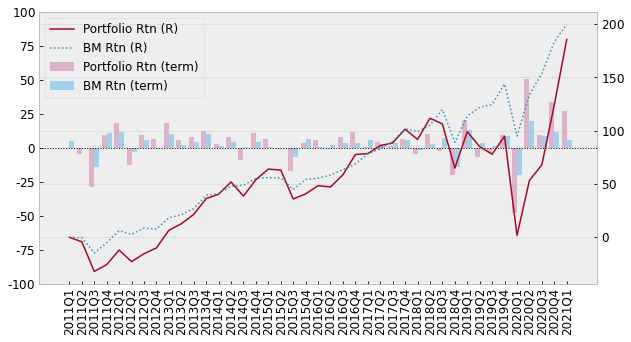

In [29]:
fs.draw_return(df) # 기간별 수익률 그래프 그려보기

In [31]:
df = fs.fn_single(otp='16486231081001081001', symbol='NKE', window='T') # 나이키(NKE) 재무제표 데이터 불러오기

In [32]:
df['Market Cap'] = df['Price'] * df['Shares'] # 시가총액 계산
df['EV'] = df['Market Cap'] + df['Long Term Debt'] + df['Current Debt'] - df['Cash & Equivalents'] # EV 계산

In [33]:
df['EV/EBITDA'] = df['EV'] / df['EBITDA'] # EV/EBITDA 계산

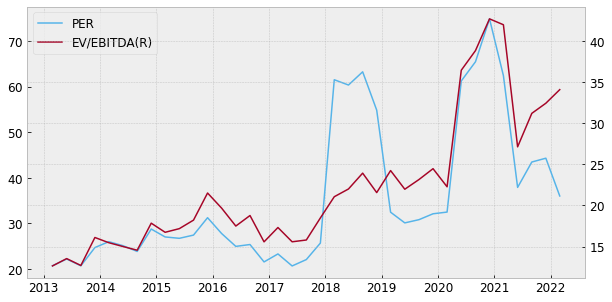

In [34]:
# EV/EBITDA와 PER 비교
df['PER'] = df['Price'] / df['EPS'] # PER 계산
fs.draw_chart(df, left='PER', right='EV/EBITDA') # PER 대비 EV/EBITDA 비교

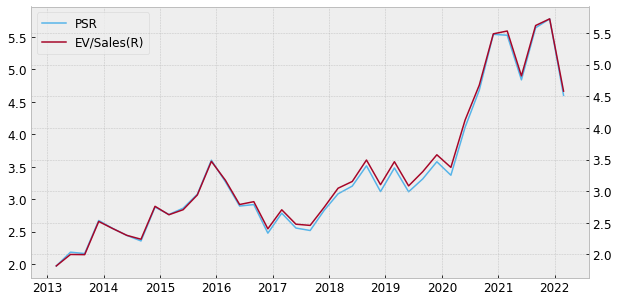

In [35]:
df['EV/Sales'] = df['EV'] / df['Revenue'] # EV/Sales 계산
df['PSR'] = df['Price'] / (df['Revenue'] / df['Shares']) # PSR 계산
fs.draw_chart(df, left='PSR', right='EV/Sales') # PSR 대비 EV/Sales 비교

In [37]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 - 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t) # 분기별 재무제표 데이터 불러오기

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [39]:
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents'] # 분기별 EV 계산

In [49]:
for t in terms:
  data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA'] # 분기별 EV/EBITDA 계산
  data[t].loc[(data[t]['EV'] <= 0) | (data[t]['EBITDA'] <= 0), 'EV/EBITDA'] = float('nan') # EV가 음수 or EBITDA가 음수일 경우, nan으로 처리

In [50]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True) # EV/EBITDA 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

In [51]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

CAGR: 9.48%
Accumulated return: 147.56%
Investment period: 10.0yrs
Sharpe ratio: 0.51
MDD: -49.39%


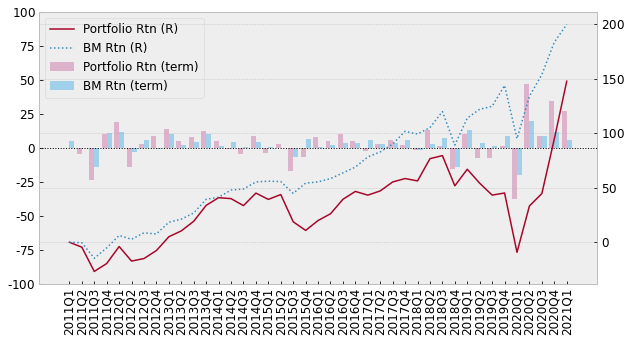

In [52]:
fs.draw_return(df) # 기간별 수익률 그래프

In [53]:
# EV/Sales 백테스팅 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t) # 분기별 재무제표 데이터 불러오기

s = {}
signal = {}
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents'] # 분기별 EV 계산

  data[t]['EV/Sales'] = data[t]['EV'] / data[t]['Revenue'] # 분기별 EV/Sales 계산
  data[t].loc[(data[t]['EV'] <= 0) | (data[t]['Revenue'] <= 0), 'EV/Revenue'] = float('nan') # EV가 음수인 경우 or Revenue가 음수인 경우 nan 처리

  s[t] = fs.fn_filter(data[t], by='EV/Sales', floor=0, n=30, asc=True) # EV/Sales 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 27.30%
Accumulated return: 1019.81%
Investment period: 10.0yrs
Sharpe ratio: 3.04
MDD: -26.79%


In [54]:
df = fs.fn_single(otp='16486231081001081001', symbol='FB', window='T') # 페이스북(TB) 재무제표 불러오기

In [55]:
df['NCAV'] = df['Current Assets'] - df['Total Liabilities'] # NCAV 계산
df['Market Cap'] = df['Price'] * df['Shares'] # 시가총액 계산
df['Safety Margin'] = df['NCAV'] - df['Market Cap'] * 1.5 # 안전마진 계산

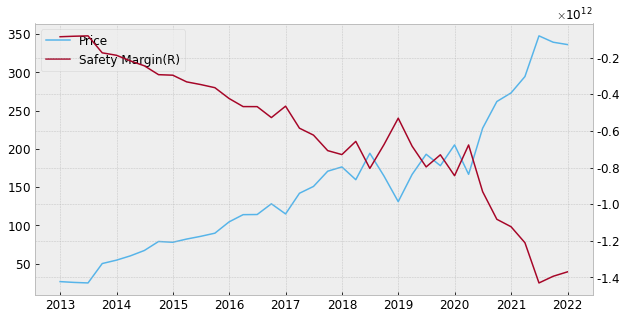

In [56]:
fs.draw_chart(df, left='Price', right='Safety Margin') # 주가와 안전대비 비교 그래프

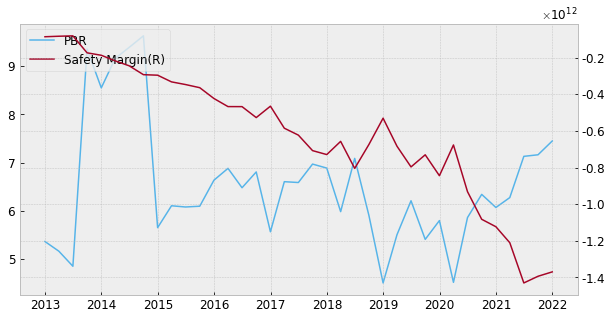

In [57]:
# PBR과 비교
df['PBR'] = df['Price'] / (df['Shareholders Equity'] / df['Shares']) # BPR 계산
fs.draw_chart(df, left='PBR', right='Safety Margin') # PBR과 안전마진 비교 그래프

In [59]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t, vol=10000) # 분기별 재무제표 데이터 불러오기

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [60]:
for t in terms:
  data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities'] # 분기별 NCAV 계산
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap'] * 1.5 # 분기별 안전마진 계산

In [61]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False) # 안전마진 기준 상위 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

In [62]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

CAGR: 24.39%
Accumulated return: 788.32%
Investment period: 10.0yrs
Sharpe ratio: 2.51
MDD: -5.93%


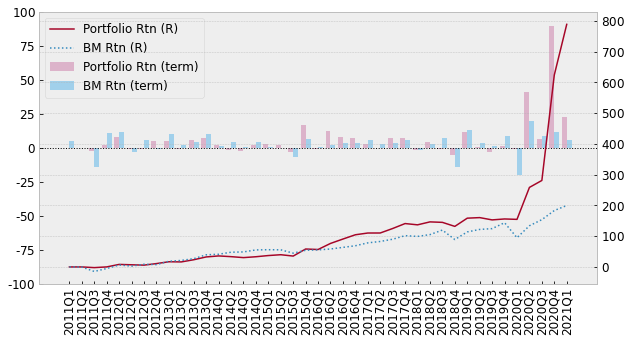

In [63]:
fs.draw_return(df) # 기간별 수익률 그래프

In [64]:
for k, v in signal.items():
  print(k, len(v))

2010Q4 0
2011Q1 4
2011Q2 14
2011Q3 12
2011Q4 8
2012Q1 13
2012Q2 12
2012Q3 14
2012Q4 9
2013Q1 9
2013Q2 7
2013Q3 4
2013Q4 5
2014Q1 7
2014Q2 7
2014Q3 7
2014Q4 8
2015Q1 7
2015Q2 11
2015Q3 12
2015Q4 9
2016Q1 15
2016Q2 9
2016Q3 14
2016Q4 6
2017Q1 12
2017Q2 11
2017Q3 6
2017Q4 7
2018Q1 7
2018Q2 8
2018Q3 14
2018Q4 13
2019Q1 13
2019Q2 18
2019Q3 20
2019Q4 30
2020Q1 29
2020Q2 30
2020Q3 22
2020Q4 18


In [65]:
df = fs.fn_single(otp='16486231081001081001', symbol='AAPL', window='T') # 애플(AAPL) 재무제표 데이터 불러오기

In [66]:
df['PER'] = df['Price'] / df['EPS'] # PER 계산
df['EPS Growth'] = (df['EPS'] - df['EPS'].shift(4)) / abs(df['EPS'].shift(4)) * 100 # EPS 성장률 계산
df['PEG'] = (df['Price'] / df['EPS']) / df['EPS Growth'] # PEG 계산

In [67]:
df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10) # EPS, EPS 성장률, PER, PEG columns의 마지막 10개 데이터

,EPS,EPS Growth,PER,PEG
2019-09-30,2.98,-0.25,18.76,-74.84
2019-12-31,3.19,3.99,23.01,5.76
2020-03-31,3.22,7.34,19.76,2.69
2020-06-30,3.32,12.26,27.47,2.24
2020-09-30,3.30,10.47,35.12,3.35
2020-12-31,3.72,16.54,35.69,2.16
2021-03-31,4.47,39.01,27.31,0.70
2021-06-30,5.12,54.22,26.75,0.49
2021-09-30,5.62,70.43,25.18,0.36
2021-12-31,6.04,62.47,29.40,0.47


In [68]:
# 비교를 위해 AMZN의 PEG를 산출
df = fs.fn_single(otp='16486231081001081001', symbol='AMZN', window='T') # 아마존(AMZN) 재무제표 데이터 불러오기
df['PER'] = df['Price'] / df['EPS'] # PER 계산
df['EPS Growth'] = (df['EPS'] - df['EPS'].shift(4)) / abs(df['EPS'].shift(4)) * 100 # EPS 성장률 계산
df['PEG'] = (df['Price'] / df['EPS']) / df['EPS Growth'] # PEG 계산
df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10) # EPS, EPS 성장률, PER, PEG columns의 마지막 10개 데이터

,EPS,EPS Growth,PER,PEG
2019-09-30,23.05,25.75,75.31,2.92
2019-12-31,23.45,13.50,78.80,5.84
2020-03-31,21.30,-13.20,91.54,-6.93
2020-06-30,26.48,7.42,104.19,14.03
2020-09-30,34.80,50.98,90.48,1.77
2020-12-31,42.30,80.38,77.00,0.96
2021-03-31,53.01,148.87,58.37,0.39
2021-06-30,57.64,117.67,59.68,0.51
2021-09-30,51.14,46.95,64.24,1.37
2021-12-31,64.82,53.24,51.44,0.97


In [71]:
# PEG
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t) # 분기별 재무제표 데이터 불러오기

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [72]:
s = {}
signal = {}
for t in terms:
  t_4 = fs.quarters_before(terms, t, 4) # 4분기 이전
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 분기별 PER 계산
  data[t]['EPS Growth'] = (data[t]['EPS'] - data[t_4]['EPS']) / abs(data[t_4]['EPS']) * 100 # 분기별 EPS 성장률 계산
  data[t]['PEG'] = data[t]['PER'] / data[t]['EPS Growth'] # 분기별 PEG 계산
  data[t].loc[(data[t]['PER'] <= 0) | (data[t]['EPS Growth'] <= 0), 'PEG'] = float('nan') # PER이 음수 or EPS 성장률이 음수인 경우 nan 처리

  s[t] = fs.fn_filter(data[t], by='PEG', floor=.1, cap=1, n=30, asc=True) # PEG 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

CAGR: 10.45%
Accumulated return: 170.32%
Investment period: 10.0yrs
Sharpe ratio: 0.83
MDD: -37.05%


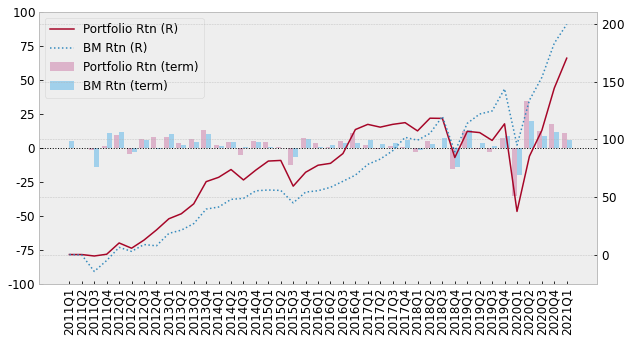

In [73]:
fs.draw_return(df)

In [74]:
# 여기부터 6장
import finterstellar as fs

In [75]:
df = fs.fn_single(otp='16486231081001081001', symbol='BABA', window='T')

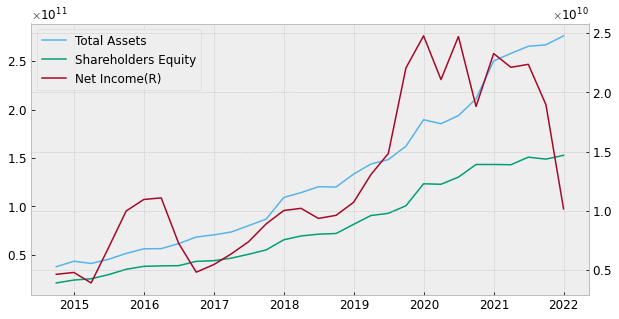

In [77]:
fs.draw_chart(df, left=['Total Assets', 'Shareholders Equity'], right='Net Income')

In [78]:
df['Total Assets'].tail()

2020-12-31   250,179,741,935.48
2021-03-31   258,006,563,706.56
2021-06-30   265,318,404,118.40
2021-09-30   266,867,008,985.88
2021-12-31   276,115,000,000.00
Name: Total Assets, dtype: float64

In [79]:
df['Total Assets'].shift(4).tail()

2020-12-31   189,534,000,000.00
2021-03-31   185,429,000,000.00
2021-06-30   193,794,000,000.00
2021-09-30   211,150,000,000.00
2021-12-31   250,179,741,935.48
Name: Total Assets, dtype: float64

In [80]:
df['Shifted Total Assets'] = df['Total Assets'].shift(4) # 4분기전 Total Assets
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2 # 4분기전 Total Assets과 이번분기 Total Assets의 평균값
df[['Total Assets', 'Shifted Total Assets', 'Avg Assets']]

,Total Assets,Shifted Total Assets,Avg Assets
2014-09-30,"37,853,000,000.00",NaN,NaN
2014-12-31,"43,515,000,000.00",NaN,NaN
2015-03-31,"41,206,000,000.00",NaN,NaN
2015-06-30,"45,494,000,000.00",NaN,NaN
2015-09-30,"51,570,000,000.00","37,853,000,000.00","44,711,500,000.00"
2015-12-31,"56,296,000,000.00","43,515,000,000.00","49,905,500,000.00"
2016-03-31,"56,521,000,000.00","41,206,000,000.00","48,863,500,000.00"
2016-06-30,"61,688,000,000.00","45,494,000,000.00","53,591,000,000.00"
2016-09-30,"68,441,000,000.00","51,570,000,000.00","60,005,500,000.00"
2016-12-31,"70,699,000,000.00","56,296,000,000.00","63,497,500,000.00"


In [82]:
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['ROA'] = df['Net Income'] / df['Avg Assets']
df[['ROA', 'Net Income', 'Avg Assets']].tail()

,ROA,Net Income,Avg Assets
2020-12-31,0.11,"23,282,129,032.26","219,856,870,967.74"
2021-03-31,0.10,"22,116,856,187.99","221,717,781,853.28"
2021-06-30,0.10,"22,367,085,274.21","229,556,202,059.20"
2021-09-30,0.08,"18,958,454,978.96","239,008,504,492.94"
2021-12-31,0.04,"10,161,479,792.86","263,147,370,967.74"


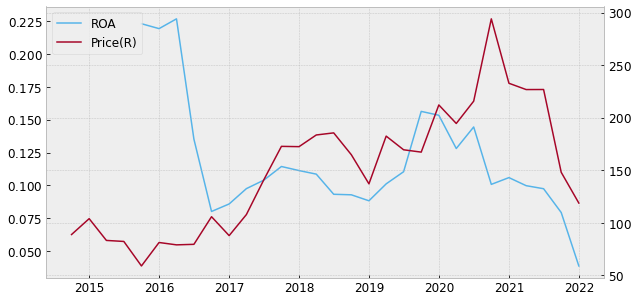

In [83]:
fs.draw_chart(df, left='ROA', right='Price')

In [85]:
df['Avg Equity'] = (df['Shareholders Equity'] + df['Shareholders Equity'].shift(4)) / 2
df['ROE'] = df['Net Income'] / df['Avg Equity']
df[['ROE', 'Net Income', 'Avg Equity']].tail()

,ROE,Net Income,Avg Equity
2020-12-31,0.17,"23,282,129,032.26","133,398,629,032.26"
2021-03-31,0.17,"22,116,856,187.99","133,025,074,002.57"
2021-06-30,0.16,"22,367,085,274.21","140,605,113,899.61"
2021-09-30,0.13,"18,958,454,978.96","146,117,050,706.03"
2021-12-31,0.07,"10,161,479,792.86","148,084,885,442.51"


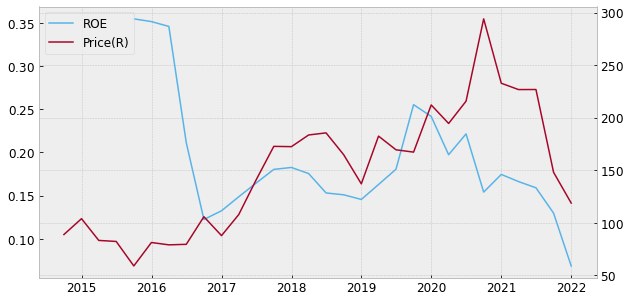

In [86]:
fs.draw_chart(df, left='ROE', right='Price')

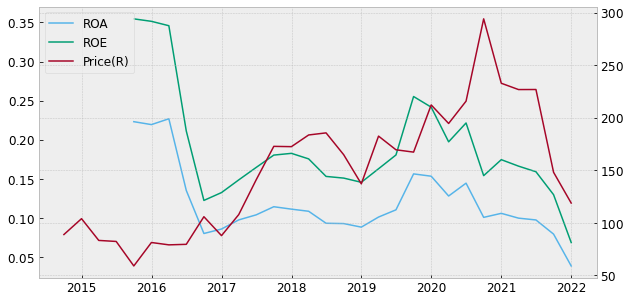

In [87]:
fs.draw_chart(df, left=['ROA', 'ROE'], right='Price')

In [88]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [91]:
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')

In [92]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='ROA', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

In [93]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.23%
Accumulated return: 66.51%
Investment period: 10.0yrs
Sharpe ratio: 0.32
MDD: -33.96%


In [94]:
# ROE 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486231081001081001', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


CAGR: 7.82%
Accumulated return: 112.54%
Investment period: 10.0yrs
Sharpe ratio: 0.61
MDD: -25.78%


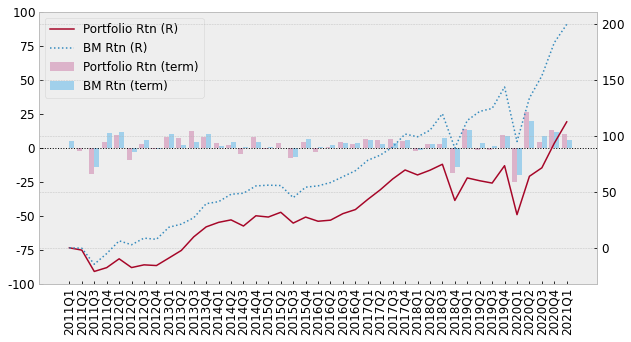

In [96]:
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')

  s[t] = fs.fn_filter(data[t], by='ROE', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [97]:
df = fs.fn_single(otp='16486231081001081001', symbol='JPM', window='T')

In [98]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['ROE'] = df['Net Income'] / df['Shareholders Equity']

In [99]:
df['ROE3AVG'] = df['ROE'].rolling(12).mean()

In [100]:
df['RIM'] = df['BPS'] * df['ROE3AVG'] / .1

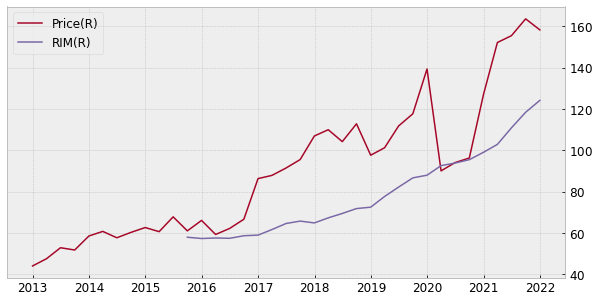

In [101]:
fs.draw_chart(df, right=['Price', 'RIM'])

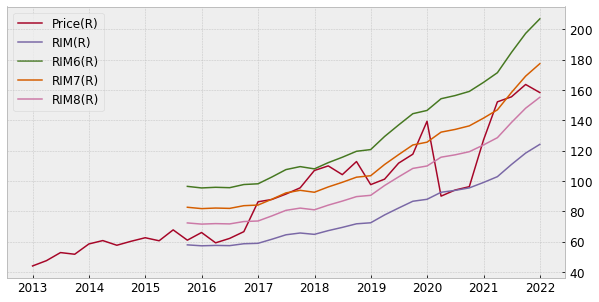

In [102]:
# 밴드 그리기
df['RIM6'] = df['BPS'] * df['ROE3AVG'] / .06
df['RIM7'] = df['BPS'] * df['ROE3AVG'] / .07
df['RIM8'] = df['BPS'] * df['ROE3AVG'] / .08
fs.draw_chart(df, right=['Price', 'RIM', 'RIM6', 'RIM7', 'RIM8'])

In [107]:
for t in terms:
  t_1 = fs.quarters_before(terms, t, 4)
  t_2 = fs.quarters_before(terms, t, 8)
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[t_1]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['Avg ROE'] = (data[t]['ROE'] + data[t_1]['ROE'] + data[t_2]['ROE']) / 3
  data[t]['RIM'] = data[t]['BPS'] * data[t]['Avg ROE'] / .1
  data[t]['P/RIM'] = data[t]['Price_M3'] / data[t]['RIM']

In [108]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='P/RIM', floor=0, cap=1, n=30, asc=True)
  signal[t] = list(s[t].index)

In [110]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.97%
Accumulated return: 96.32%
Investment period: 10.0yrs
Sharpe ratio: 0.35
MDD: -46.61%


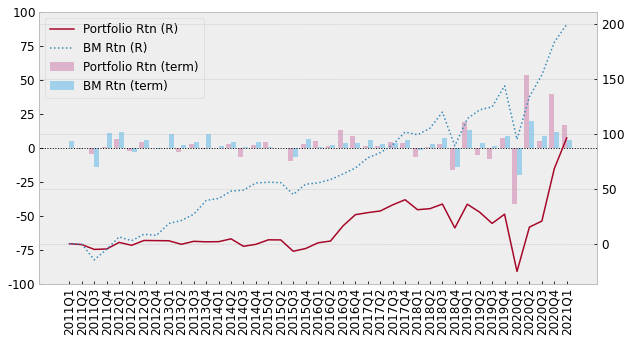

In [111]:
fs.draw_return(df)